In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../Data/process/1#High-Temp Fan.csv")
df.shape

/var/folders/q8/lvj6ms8d6g371mc9cl99f_6w0000gn/T/ipykernel_29190/2415441826.py:4: DtypeWarning: Columns (0,1,5,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../Data/process/1#High-Temp Fan.csv")


(3609575, 11)

In [2]:
df.head()

,id,Measurement,Date,Time,data,unit,device,location,Device,Metric,Rating
0,67c29baa30e6dd385f031b39,Vibration Velocity Z,2025-04-15,23:10:25,1.01529,mm/s,1#High-Temp Fan,Motor Drive End,NaN,NaN,NaN
1,67c29baa30e6dd385f031b39,Vibration Velocity Z,2025-04-15,23:10:20,1.03159,mm/s,1#High-Temp Fan,Motor Drive End,NaN,NaN,NaN
2,67c29baa30e6dd385f031b39,Vibration Velocity Z,2025-04-15,23:10:15,0.97922,mm/s,1#High-Temp Fan,Motor Drive End,NaN,NaN,NaN
3,67c29baa30e6dd385f031b39,Vibration Velocity Z,2025-04-15,23:10:10,1.06316,mm/s,1#High-Temp Fan,Motor Drive End,NaN,NaN,NaN
4,67c29baa30e6dd385f031b39,Vibration Velocity Z,2025-04-15,23:10:05,1.01141,mm/s,1#High-Temp Fan,Motor Drive End,NaN,NaN,NaN


In [3]:
df.tail()

,id,Measurement,Date,Time,data,unit,device,location,Device,Metric,Rating
3609570,NaN,NaN,2025-04-15,21:20:00,NaN,NaN,1#High-Temp Fan,Rating,1#High-temperature Fan,alignment_status,98.00
3609571,NaN,NaN,2025-04-15,21:20:00,NaN,NaN,1#High-Temp Fan,Rating,1#High-temperature Fan,fit_condition,97.34
3609572,NaN,NaN,2025-04-15,21:20:00,NaN,NaN,1#High-Temp Fan,Rating,1#High-temperature Fan,bearing_lubrication,90.26
3609573,NaN,NaN,2025-04-15,21:20:00,NaN,NaN,1#High-Temp Fan,Rating,1#High-temperature Fan,rubbing_condition,96.46
3609574,NaN,NaN,2025-04-15,21:20:00,NaN,NaN,1#High-Temp Fan,Rating,1#High-temperature Fan,electromagnetic_status,98.00


In [4]:
df.describe()

,data,Rating
count,3.597797e+06,11778.000000
mean,6.441466e+00,93.534755
std,1.178442e+01,5.126144
min,3.490900e-01,62.890000
25%,7.230800e-01,90.072500
50%,1.096590e+00,95.410000
75%,2.609830e+00,97.700000
max,3.852107e+02,99.390000


In [5]:
df.isnull().sum()

id               11778
Measurement      11778
Date                 0
Time                 0
data             11778
unit             11778
device               0
location             0
Device         3597797
Metric         3597797
Rating         3597797
dtype: int64

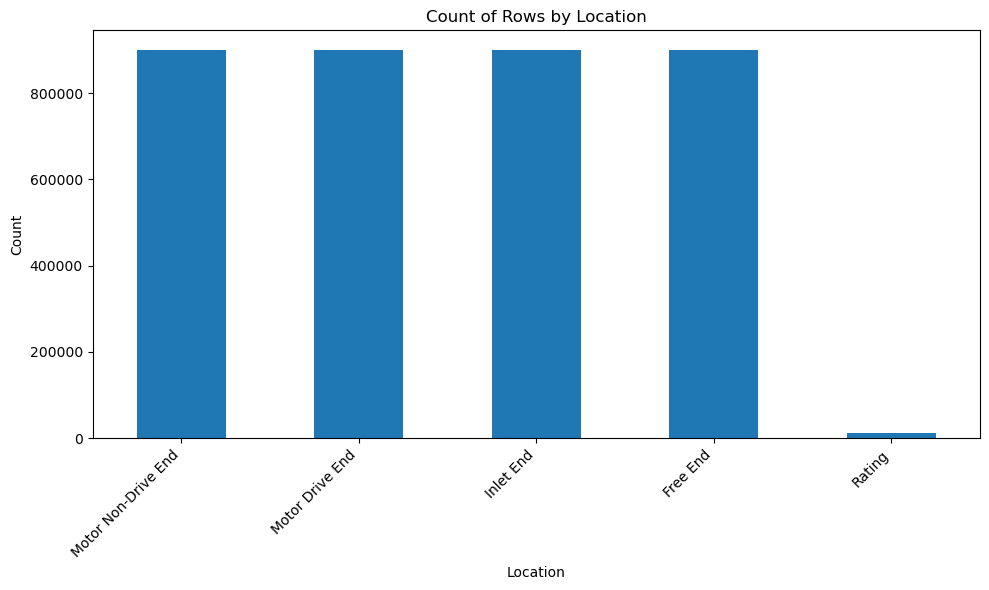

In [6]:
location_counts = df['location'].value_counts()

plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar')

plt.title('Count of Rows by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [7]:
unique_metrics = df['Metric'].unique()
print("Unique Metrics:")
print(unique_metrics)

unique_measurements = df['Measurement'].unique()
print("\nUnique Measurements:")
print(unique_measurements)

Unique Metrics:
[nan 'velocity_rms' 'crest_factor' 'kurtosis_opt' 'rms_1_10khz'
 'rms_10_25khz' 'rotor_balance_status' 'alignment_status' 'fit_condition'
 'bearing_lubrication' 'rubbing_condition' 'electromagnetic_status']

Unique Measurements:
['Vibration Velocity Z' 'High-Frequency Acceleration' 'Temperature'
 'Low-Frequency Acceleration Z' nan]


In [8]:
pivot_df = df.copy().drop(columns=['Device','Metric','Rating']).dropna()
pivot_df = pivot_df.pivot_table(
    index=['id', 'Date', 'Time', 'device', 'location'],
    columns='Measurement',
    values='data'
)
pivot_df = pivot_df.reset_index()

pivot_df.head()

Measurement,id,Date,Time,device,location,High-Frequency Acceleration,Low-Frequency Acceleration Z,Temperature,Vibration Velocity Z
0,67c29baa30e6dd385f031b30,2025-04-01,00:00:00,1#High-Temp Fan,Motor Non-Drive End,3.40113,0.42321,22.2,0.45135
1,67c29baa30e6dd385f031b30,2025-04-01,00:00:05,1#High-Temp Fan,Motor Non-Drive End,3.41262,0.41772,NaN,0.49303
2,67c29baa30e6dd385f031b30,2025-04-01,00:00:10,1#High-Temp Fan,Motor Non-Drive End,3.42950,0.43460,22.2,0.50496
3,67c29baa30e6dd385f031b30,2025-04-01,00:00:15,1#High-Temp Fan,Motor Non-Drive End,3.41254,0.42760,NaN,0.49421
4,67c29baa30e6dd385f031b30,2025-04-01,00:00:20,1#High-Temp Fan,Motor Non-Drive End,3.42347,0.43936,22.2,0.50060


In [9]:
target_df = df.copy().drop(columns=['id', 'Measurement', 'data','unit','device']).dropna()
target_df = target_df.pivot_table(
    index=['Date', 'Time', 'location', 'Device'],
    columns='Metric',
    values='Rating'
)
target_df = target_df.reset_index()
target_df.head()

Metric,Date,Time,location,Device,alignment_status,bearing_lubrication,crest_factor,electromagnetic_status,fit_condition,kurtosis_opt,rms_10_25khz,rms_1_10khz,rotor_balance_status,rubbing_condition,velocity_rms
0,2025-04-01,00:00:01,Rating,1#High-temperature Fan,98.0,86.14,78.09,97.14,98.0,87.18,84.16,75.91,97.31,88.90,95.28
1,2025-04-01,00:20:00,Rating,1#High-temperature Fan,98.0,87.01,88.76,98.00,98.0,87.10,94.75,91.13,97.32,97.31,95.49
2,2025-04-01,00:40:00,Rating,1#High-temperature Fan,98.0,89.53,89.07,98.00,98.0,86.96,93.94,93.11,97.35,98.32,95.51
3,2025-04-01,01:00:01,Rating,1#High-temperature Fan,98.0,95.96,87.01,98.00,98.0,87.31,94.79,92.80,97.24,98.35,95.34
4,2025-04-01,01:20:00,Rating,1#High-temperature Fan,98.0,81.38,73.93,94.85,98.0,87.39,95.00,67.44,97.40,81.83,95.39


In [10]:
pivot_df.to_csv("../Data/process/high_temp_fan_feature.csv", index=False)

In [11]:
pivot_df.to_csv("../Data/process/high_temp_fan_target.csv", index=False)